# Enron Scandal: Indentifying Person of Interest

**Identification of Enron employees who may have committed fraud**

**Supervised Learning. Classification**

Data: [Enron financial dataset from Udacity](https://github.com/udacity/ud120-projects/tree/master/final_project)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper
import keras

helper.info_gpu()
#sns.set_palette("Reds")
helper.reproducible(seed=0)  # setup reproducible results from run to run using Keras

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


/device:GPU:0
Keras		v2.1.3
TensorFlow	v1.4.1


## 1. Data Processing and Exploratory Data Analysis

###  Load the Data

In [2]:
data_path = 'data/enron_financial_data.pkl'
target = ['poi']

df = pd.read_pickle(data_path)
df = pd.DataFrame.from_dict(df, orient='index')

### Explore the Data

In [3]:
helper.info_data(df, target)

Samples: 	146 
Features: 	20
Target: 	['poi']

Binary target: 	{False: 128, True: 18}
Ratio 		7.1 : 1.0
Dummy accuracy:	0.88


** Imbalanced target: the evaluation metric used in this problem is the Area Under the ROC Curve ** <br>
**poi** =  person of interest (boolean) <br>

In [4]:
df.head(3)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN


### Transform the data

In [5]:
# delete 'TOTAL' row (at the bottom)
if 'TOTAL' in df.index:
    df.drop('TOTAL', axis='index', inplace=True)

# convert dataframe values (objects) to numerical. There are no categorical features
df = df.apply(pd.to_numeric, errors='coerce')

#### Missing features

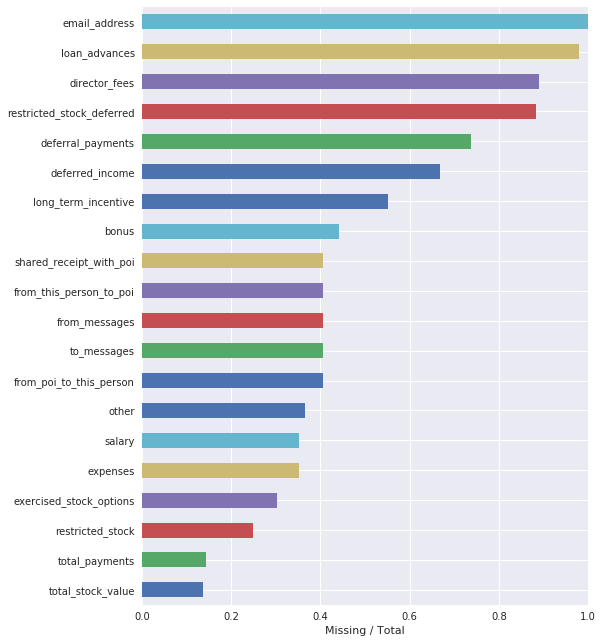

In [6]:
helper.missing(df)

High-missing features, like 'loan_advances', are needed to obtain better models

#### Remove irrelevant features

In [7]:
df.drop('email_address', axis='columns', inplace=True)

#### Classify variables

In [8]:
num = list(df.select_dtypes(include=[np.number]))

df = helper.classify_data(df, target, numerical=num)

helper.get_types(df)

Numerical features: 	19
Categorical features: 	0
Target: 		poi (category)


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,poi
Type,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,category


#### Fill missing values

In [9]:
# Reeplace NaN values with the median
df.fillna(df.median(), inplace=True)
#helper.fill_simple(df, target, inplace=True) # same result

### Visualize the data

In [10]:
df.describe(percentiles=[0.5]).astype(int)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
mean,275172,1722,383687,2402823,2537413,1002369,-50907,-293981,3040758,51503,52,2455073,377,314211,27,567548,999,972059,104361
std,142866,2029,708602,8785497,6606450,1097889,1305242,575095,6112358,37235,68,4646612,1441,1122664,78,597613,930,1972272,14229
min,477,57,-102500,148,400000,70000,-1787380,-3504386,-44093,148,0,3285,12,2,0,69223,2,-2604490,3285
50%,258741,1211,221063,1100246,2000000,750000,-140264,-151927,1095040,46547,35,1297049,41,51984,8,422158,740,441096,106164
max,1111258,15149,6426990,103559792,81525000,8000000,15456290,-833,49110080,228763,528,34348384,14368,10359729,609,5145434,5521,14761694,137864


#### Numerical features

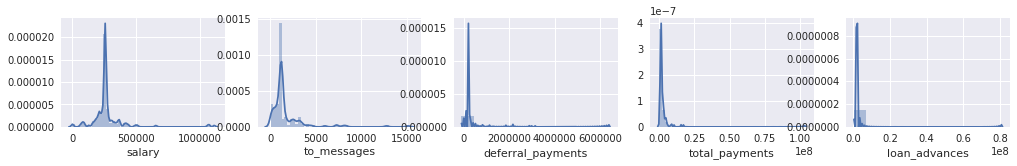

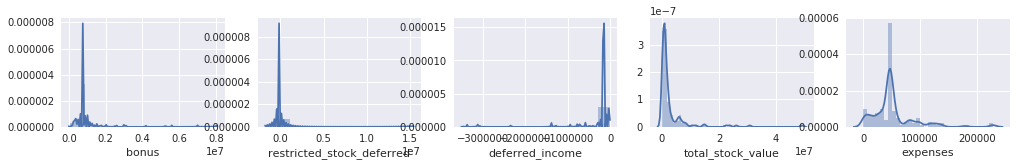

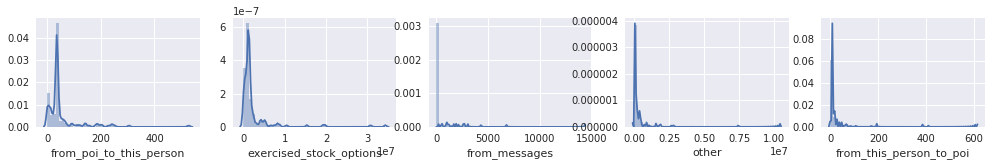

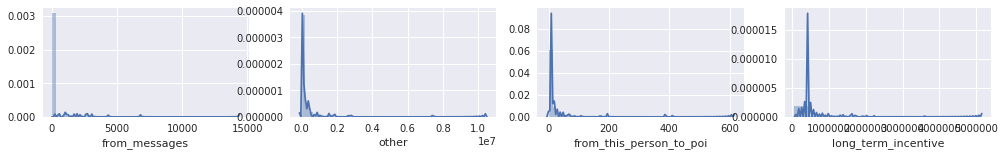

In [11]:
helper.show_numerical(df, kde=True, ncols=5)

#### Target vs Numerical features

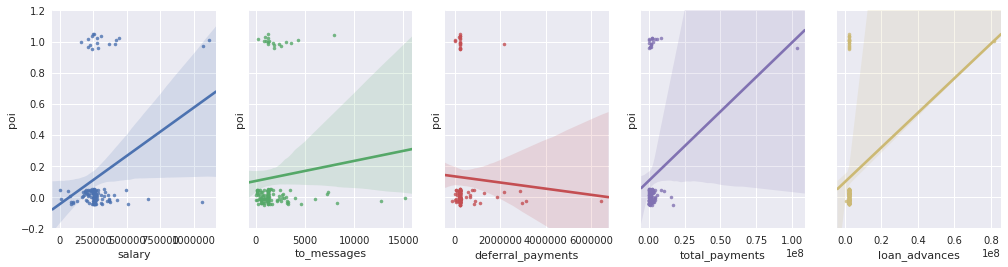

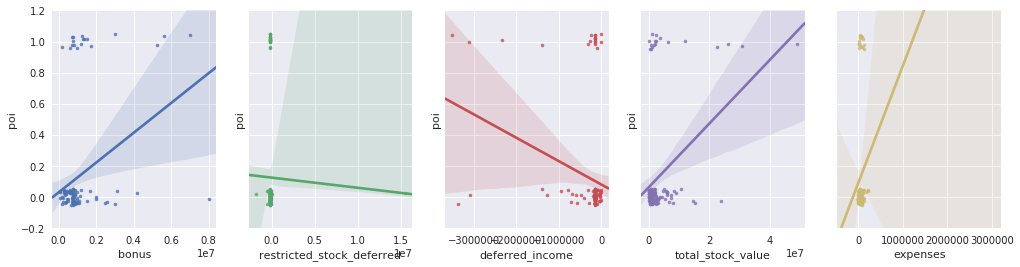

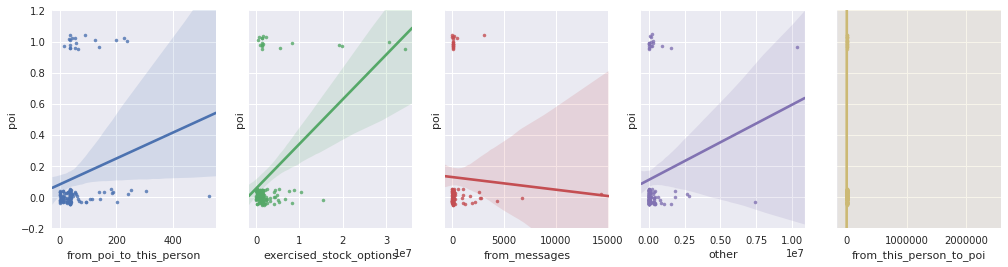

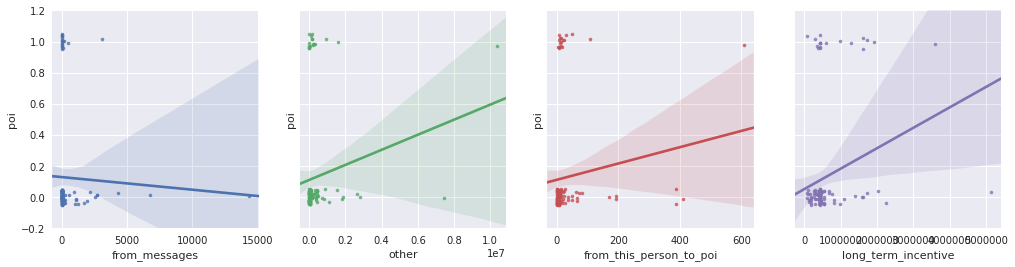

In [12]:
helper.show_target_vs_numerical(df, target, jitter=0.05, point_size=50, ncols=5)

#### Total stock value vs some features 

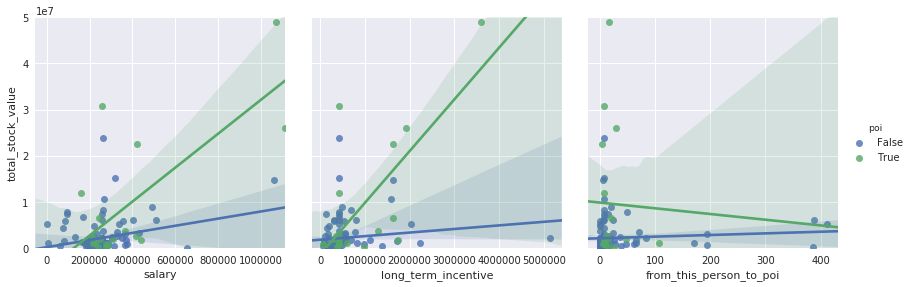

In [13]:
# df.plot.scatter(x='salary', y='total_stock_value')
# df.plot.scatter(x='long_term_incentive', y='total_stock_value')

# sns.lmplot(x="salary", y="total_stock_value", hue='poi', data=df)
# sns.lmplot(x="long_term_incentive", y="total_stock_value", hue='poi', data=df)

g = sns.PairGrid(
    df,
    y_vars=["total_stock_value"],
    x_vars=["salary", "long_term_incentive", "from_this_person_to_poi"],
    hue='poi',
    size=4)
g.map(sns.regplot).add_legend()
plt.ylim(ymin=0, ymax=0.5e8);

#sns.pairplot(df, hue='poi', vars=['long_term_incentive', 'total_stock_value', 'from_poi_to_this_person'], kind='reg', size=3)

The person of interest seems to have a higher stock vs salary and long-term incentive, especially when his stock value is high. There is no dependency between POI and the amount of emails from or to another person of interest.

#### Correlation between numerical features and target

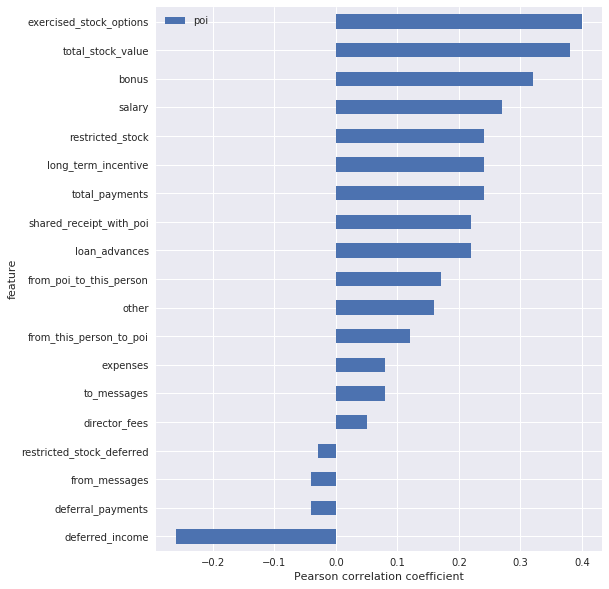

In [14]:
helper.correlation(df, target)

## 2. Neural Network model

### Select the features

In [15]:
droplist = []  # features to drop from the model

# For the model 'data' instead of 'df'
data = df.copy()
data.drop(droplist, axis='columns', inplace=True)
data.head(3)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,poi
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,2000000.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,106164.5,False
BADUM JAMES P,258741.0,1211.0,178980.0,182466.0,2000000.0,750000.0,-140264.0,-151927.0,257817.0,3486.0,35.0,257817.0,41.0,51984.5,8.0,422158.0,740.5,441096.0,106164.5,False
BANNANTINE JAMES M,477.0,566.0,221063.5,916197.0,2000000.0,750000.0,-560222.0,-5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,422158.0,465.0,1757552.0,106164.5,False


### Scale numerical features
Shift and scale numerical variables to a standard normal distribution. The scaling factors are saved to be used for predictions.

In [16]:
data, scale_param = helper.scale(data)

There are no categorical variables

### Split the data into training and test sets
Data leakage: Test set hidden when training the model, but seen when preprocessing the dataset

No validation set (small dataset)

In [17]:
test_size = 0.4
random_state = 9

x_train, y_train, x_test, y_test = helper.simple_split(data, target, True, test_size,
                                                       random_state)

### Encode the output

In [18]:
y_train, y_test = helper.one_hot_output(y_train, y_test)

In [19]:
print("train size \t X:{} \t Y:{}".format(x_train.shape, y_train.shape))
print("test size  \t X:{} \t Y:{} ".format(x_test.shape, y_test.shape))

train size 	 X:(87, 19) 	 Y:(87, 2)
test size  	 X:(58, 19) 	 Y:(58, 2) 


### Build a dummy classifier

In [20]:
helper.dummy_clf(x_train, y_train, x_test, y_test)


Confusion matrix: 
 [[51  0]
 [ 7  0]]


,Loss,Accuracy,Precision,Recall,ROC-AUC,F1-score
Dummy,4.17,0.88,0.0,0,0,0


### Build the Neural Network for Binary Classification

In [21]:
# class weight for imbalance target

cw = helper.get_class_weight(y_train[:,1])

{0: 0.5723684210526315, 1: 3.9545454545454546}


In [22]:
model = helper.build_nn_clf(x_train.shape[1], y_train.shape[1], dropout=0.3, summary=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_1 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 40        
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


Training ....
time: 	 0.6 s


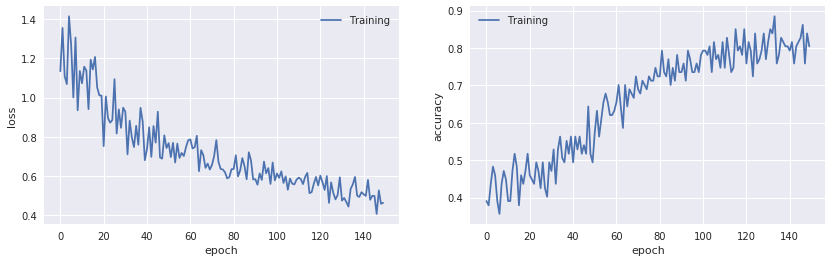


Training loss:  	0.4630

Training accuracy: 	0.805

Model saved at models/enron_scandal.h5

ROC_AUC train:	0.91 



In [29]:
from time import time
model_path = os.path.join("models", "enron_scandal.h5")


def train_nn(model, x_train, y_train, validation_data=None, path=False, show=True):
    """ 
    Train the neural network model. If no validation_data is provided, a split for validation
    will be used
    """
    
    if show:
        print('Training ....')
    
    #callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=0)]
    t0 = time()

    history = model.fit(
        x_train,
        y_train,
        epochs=150,
        batch_size=128,              
        verbose=0,
        class_weight=cw,
        # validation_split=0,
        # validation_data = validation_data,
        # callbacks=callbacks
    )

    if show:
        print("time: \t {:.1f} s".format(time() - t0))
        helper.show_training(history)

    if path:
        model.save(path)
        print("\nModel saved at", path)
    
    return history
        

model = None
model = helper.build_nn_clf(x_train.shape[1], y_train.shape[1], dropout=0.3, summary=False)
train_nn(model, x_train, y_train, path=model_path);

from sklearn.metrics import roc_auc_score
y_pred_train = model.predict(x_train, verbose=0)
print('\nROC_AUC train:\t{:.2f} \n'.format(roc_auc_score(y_train, y_pred_train)))


### Evaluate the model

In [30]:
# Dataset too small for train, validation, and test sets. More data is needed for a proper
y_pred = model.predict(x_test, verbose=0)

helper.binary_classification_scores(y_test[:, 1], y_pred[:, 1], return_dataframe=True)


Confusion matrix: 
 [[40 11]
 [ 1  6]]


,Loss,Accuracy,Precision,Recall,ROC-AUC,F1-score
,0.57,0.79,0.35,0.86,0.81,0.5


### Compare with non-neural network models

In [31]:
helper.ml_classification(x_train, y_train[:,1], x_test, y_test[:,1])

Naive Bayes
AdaBoost
Decision Tree
Random Forest
Extremely Randomized Trees


,Time (s),Loss,Accuracy,Precision,Recall,ROC-AUC,F1-score
Decision Tree,0.00,4.76,0.86,0.43,0.43,0.68,0.43
Extremely Randomized Trees,0.08,0.28,0.86,0.00,0.00,0.00,0.00
Random Forest,0.09,0.30,0.84,0.00,0.00,0.00,0.00
AdaBoost,0.06,0.50,0.81,0.25,0.29,0.73,0.27
Naive Bayes,0.00,4.88,0.74,0.25,0.57,0.83,0.35
